In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [3]:
# load the dataframe
raw_dataset = pd.read_csv("../data/module_5_auto.csv")
# copy the dataset
dataset = raw_dataset.copy()
# select objetive columns
# raw_dataset = raw_dataset.loc[:, ['highway-mpg', 'price']]
dataset = dataset._get_numeric_data()
# clean nan values
dataset = dataset.dropna()
# drop unknow columns
dataset.pop('Unnamed: 0.2')
dataset.pop('Unnamed: 0.1')
dataset.pop('Unnamed: 0')
# training and testing
dataset_labels = dataset["price"]
dataset_features = dataset.drop("price", axis=1)
train_features, test_features, train_labels, test_labels = train_test_split(
    dataset_features, 
    dataset_labels, 
    test_size=0.2,
    random_state=1
)
print("number of test samples :", test_features.shape[0])
print("number of training samples:", train_features.shape[0])

number of test samples : 40
number of training samples: 157


In [6]:
pr=PolynomialFeatures(degree=2)
train_features_pr=pr.fit_transform(train_features[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
test_features_pr=pr.fit_transform(test_features[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [23]:
RigeModel=Ridge(alpha=1)
RigeModel.fit(train_features_pr, train_labels)
yhat = RigeModel.predict(test_features_pr)
print('predicted:', yhat[0:4])
print('test set :', test_labels[0:4].values)
print(RigeModel.score(train_features_pr, train_labels))
print(RigeModel.score(test_features_pr, test_labels))

predicted: [ 5596.65567309 17896.88460235 28797.43260197 21150.65329629]
test set : [ 7295. 12964. 32528. 15690.]
0.8693585540874985
0.8147581730204115


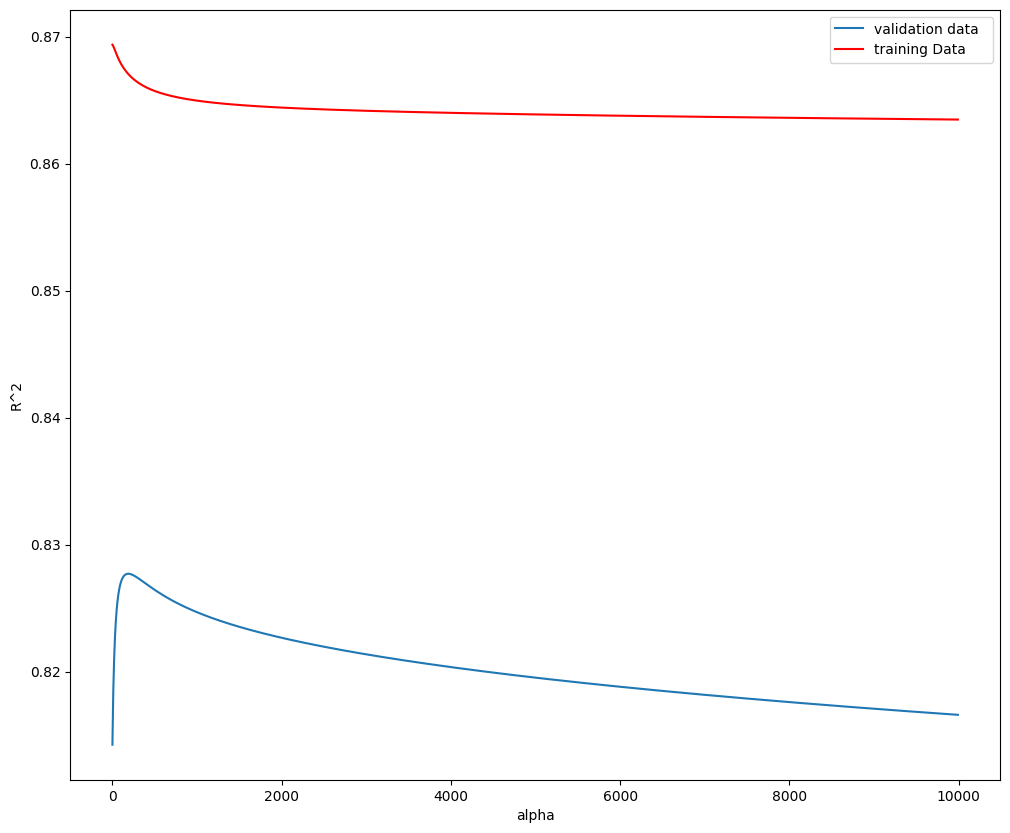

In [24]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))

for alpha in Alpha:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(train_features_pr, train_labels)
    test_score, train_score = RigeModel.score(test_features_pr, test_labels), RigeModel.score(train_features_pr, train_labels)

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()